# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

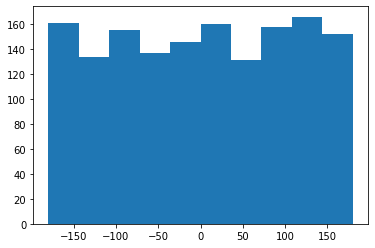

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
plt.hist(lngs)
plt.show()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_data = []
for x in cities:
    url = (f"http://api.openweathermap.org/data/2.5/weather?q={x}&appid={weather_api_key}")
    city = requests.get(url).json()
    if city['cod'] != '404':
        print(f'Requesting {city["name"]}, id:{city["id"]}.')
        city_data.append(city)

Requesting Mataura, id:6201424.
Requesting Vaini, id:4032243.
Requesting Bengkulu, id:1649150.
Requesting Ilulissat, id:3423146.
Requesting Busselton, id:2075265.
Requesting Genhe, id:2037252.
Requesting Pevek, id:2122090.
Requesting Griffith, id:4920986.
Requesting Puerto Ayora, id:3652764.
Requesting Port Alfred, id:964432.
Requesting Talcahuano, id:3870282.
Requesting Dikson, id:1507390.
Requesting Saint George, id:5546220.
Requesting São Filipe, id:3374210.
Requesting Flinders, id:6255012.
Requesting Longyearbyen, id:2729907.
Requesting Jimaní, id:3504077.
Requesting Pravokubanskiy, id:865506.
Requesting Butaritari, id:2110227.
Requesting Jamestown, id:5122534.
Requesting Yellowknife, id:6185377.
Requesting Saint-Philippe, id:935215.
Requesting Klaksvík, id:2618795.
Requesting Balkanabat, id:161616.
Requesting Oktyabr'skiy, id:515879.
Requesting Ushuaia, id:3833367.
Requesting Ucluelet, id:6171633.
Requesting Punta Arenas, id:3874787.
Requesting Hermanus, id:3366880.
Requesting San

Requesting Gushikawa, id:1863495.
Requesting Dawlatabad, id:1142226.
Requesting Feira Nova, id:3399679.
Requesting Raahe, id:640276.
Requesting De-Kastri, id:2126018.
Requesting Talaya, id:2120769.
Requesting Sambava, id:1056899.
Requesting Skjervøy, id:777682.
Requesting Tura, id:1254046.
Requesting Heishan, id:2036959.
Requesting Arrondissement de Morlaix, id:2991771.
Requesting Byron Bay, id:2172880.
Requesting Ouésso, id:2255564.
Requesting Lagoa, id:3372964.
Requesting Zholymbet, id:1516527.
Requesting Sabang, id:1214026.
Requesting Salinópolis, id:3389822.
Requesting Mildura, id:2157698.
Requesting Mananjary, id:1061335.
Requesting Tautira, id:4033557.
Requesting Luwingu, id:908913.
Requesting Coyhaique, id:3894426.
Requesting Shirwal, id:1256469.
Requesting León, id:3998655.
Requesting Kalmunai, id:1242110.
Requesting Havelock, id:4470244.
Requesting Atambua, id:1651103.
Requesting Rawson, id:3839307.
Requesting Shingū, id:1847947.
Requesting Rio Grande, id:3451138.
Requesting K

Requesting São Mateus, id:3448519.
Requesting Mweka, id:207596.
Requesting Khovu-Aksy, id:1503527.
Requesting Vila Velha, id:3445026.
Requesting Parry Sound, id:6098747.
Requesting Cap Malheureux, id:934649.
Requesting Youkounkoun, id:2414055.
Requesting Speedway, id:4265146.
Requesting Vila Franca do Campo, id:3372472.
Requesting San Juan, id:3837213.
Requesting Bilibino, id:2126682.
Requesting Kalmar, id:2702261.
Requesting Lufilufi, id:4035249.
Requesting Houston, id:4699066.
Requesting Praia da Vitória, id:3372760.
Requesting Santa Maria, id:3450083.
Requesting Taywarah, id:1122464.
Requesting Rexburg, id:5605242.
Requesting São João da Barra, id:3448903.
Requesting Puerto Escondido, id:3520994.
Requesting Tabou, id:2281120.
Requesting Sept-Îles, id:6144312.
Requesting Asău, id:686090.
Requesting Bereda, id:3105522.
Requesting Vitim, id:2013375.
Requesting Saint-Joseph, id:6690296.
Requesting Tuy Hoa, id:1563281.
Requesting Farsund, id:3157799.
Requesting Ottawa, id:6094817.
Reques

In [4]:
# df = pd.DataFrame(city_data)
# # df['Temperature'] = df['main']['temp']
# df['main'].temp
cities=[]
for x  in range( 0 , len(city_data)):
    name = city_data[x]['name']
    lattitude = city_data[x]['coord']['lat']
    longitude = city_data[x]['coord']['lon']
    temp=city_data[x]['main']['temp_max']
    humidity = city_data[x]['main']['humidity'] 
    winds= city_data[x]['wind']['speed']
    clouds = city_data[x]['clouds']['all']
    country = city_data[x]['sys']['country']
    datest=city_data[x]['dt']
    dt_object = datetime.fromtimestamp(datest)
    acdt=dt_object.strftime('%H:%M %m-%d-%Y')
    cities.append({'Name':name,'Country':country,'Lattitude':lattitude,'Longitude':longitude,'Max Temperature (k)':temp,
                   '% Humidity':humidity,'Wind Speed':winds,'Cloud Coverage':clouds, 'Time':acdt})
print(f'There are {len(cities)} cities in this list.')    

There are 565 cities in this list.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
city_df = pd.DataFrame(cities) 
city_df.head()

In [5]:
city_df = pd.DataFrame(cities) 
city_df.to_csv(output_data_file)
city_df.head()

,Name,Country,Lattitude,Longitude,Max Temperature (k),% Humidity,Wind Speed,Cloud Coverage,Time
0,Mataura,NZ,-46.19,168.86,294.26,47,4.02,0,22:48 04-10-2020
1,Vaini,TO,-21.20,-175.20,300.15,65,3.60,20,22:48 04-10-2020
2,Bengkulu,ID,-3.80,102.27,302.61,63,0.93,100,22:48 04-10-2020
3,Ilulissat,GL,69.22,-51.10,272.15,46,4.60,61,22:48 04-10-2020
4,Busselton,AU,-33.65,115.33,304.82,28,3.24,51,22:48 04-10-2020


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

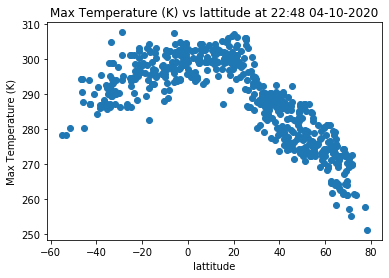

In [6]:
plt.scatter(city_df['Lattitude'],city_df['Max Temperature (k)'])
plt.xlabel('lattitude')
plt.ylabel('Max Temperature (K)')
plt.title(f'Max Temperature (K) vs lattitude at {acdt}')
plt.savefig('output_data/maxtemp.png')
plt.show()

#### Latitude vs. Humidity Plot

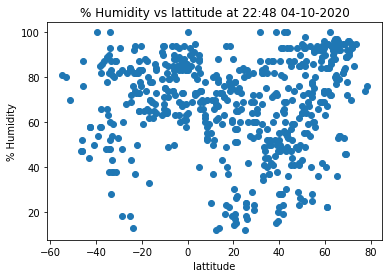

In [7]:
plt.scatter(city_df['Lattitude'],city_df['% Humidity'])
plt.xlabel('lattitude')
plt.ylabel('% Humidity')
plt.title(f'% Humidity vs lattitude at {acdt}')
plt.savefig('output_data/humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

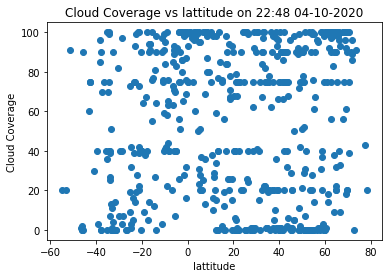

In [8]:
plt.scatter(city_df['Lattitude'],city_df['Cloud Coverage'])
plt.xlabel('lattitude')
plt.ylabel('Cloud Coverage')
plt.title(f'Cloud Coverage vs lattitude on {acdt}')
plt.savefig('output_data/cloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

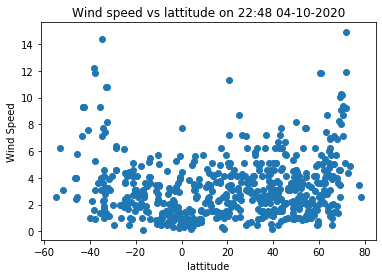

In [9]:
plt.scatter(city_df['Lattitude'],city_df['Wind Speed'])
plt.xlabel('lattitude')
plt.ylabel('Wind Speed')
plt.title(f'Wind speed vs lattitude on {acdt}')
plt.savefig('output_data/wind.png')
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    xval = np.arange(min(x)-2,max(x)+6,4)
    fit = slope * xval + intercept
    plt.plot(xval,fit,"--",color='red')
    plt.ylabel(y.name)
    plt.xlabel(x.name)
    plt.ylim(min(y)-.1*max(y),max(y)+.10*max(y))
    if x[0]>0:      #north/south check
        ns= 'North'   # variable name for streamlining file naming
        plt.title(f'{y.name} vs Lattitude in the {ns}ern Hemisphere at {acdt}')
        plt.annotate(f'y={round(slope,2)}x+{round(intercept)}',(40,max(y)+.05*max(y)),color='red')
    else:
        ns ="South"
        plt.title(f'{y.name} vs Lattitude for {ns}ern Hemisphere at {acdt}')
        plt.annotate(f'y={round(slope,2)}x+{round(intercept)}',(-30,max(y)+.05*max(y)),color='red')
    plt.savefig(f'output_data/{ns}_{y.name}vLat.png')

In [11]:
# Create Northern and Southern Hemisphere DataFrames
north = city_df.loc[(city_df['Lattitude']>0)]
north=north.reset_index()
south = city_df.loc[(city_df['Lattitude']<0)]
south=south.reset_index()
north.head()

,index,Name,Country,Lattitude,Longitude,Max Temperature (k),% Humidity,Wind Speed,Cloud Coverage,Time
0,3,Ilulissat,GL,69.22,-51.10,272.15,46,4.60,61,22:48 04-10-2020
1,5,Genhe,CN,50.78,121.52,286.30,25,2.51,0,22:48 04-10-2020
2,6,Pevek,RU,69.70,170.31,261.07,89,9.08,100,22:48 04-10-2020
3,7,Griffith,US,41.53,-87.42,280.37,65,2.27,75,22:46 04-10-2020
4,11,Dikson,RU,73.51,80.55,261.01,95,4.92,91,22:48 04-10-2020


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

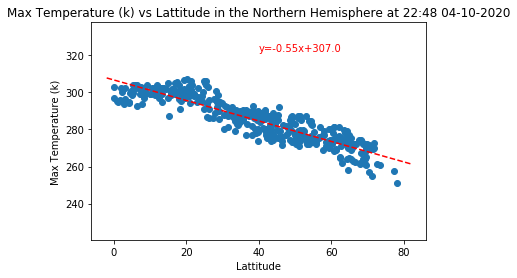

In [12]:
plt.scatter(north['Lattitude'],north['Max Temperature (k)'])
regression(north['Lattitude'],north['Max Temperature (k)'])
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

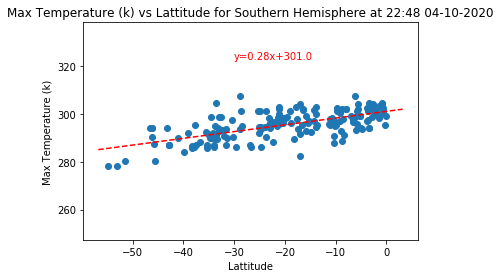

In [13]:
plt.scatter(south['Lattitude'],south['Max Temperature (k)'])
regression(south['Lattitude'],south['Max Temperature (k)'])
plt.show()

In [20]:
## These graph show how the temperature increases closer to the equater with fairly good fit. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

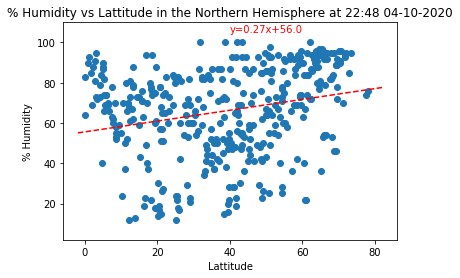

In [14]:
plt.scatter(north['Lattitude'],north['% Humidity'])
regression(north['Lattitude'],north['% Humidity'])
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

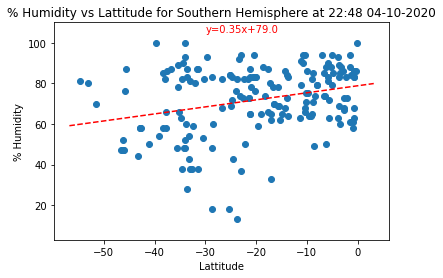

In [15]:
plt.scatter(south['Lattitude'],south['% Humidity'])
regression(south['Lattitude'],south['% Humidity'])
plt.show()

In [ ]:
## These graphs show that northern lattitudes are experiencing more humidity at this time.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

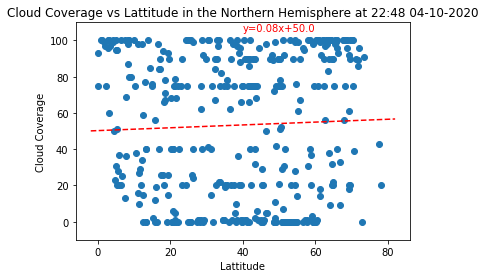

In [16]:
plt.scatter(north['Lattitude'],north['Cloud Coverage'])
regression(north['Lattitude'],north['Cloud Coverage'])
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

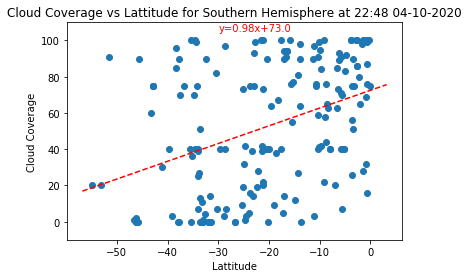

In [17]:
plt.scatter(south['Lattitude'],south['Cloud Coverage'])
regression(south['Lattitude'],south['Cloud Coverage'])
plt.show()

In [ ]:
## There is little agreement between lattitude and cloud coverage.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

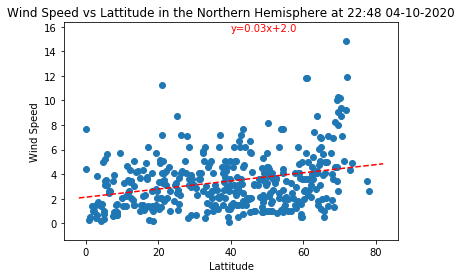

In [18]:
plt.scatter(north['Lattitude'],north['Wind Speed'])
regression(north['Lattitude'],north['Wind Speed'])
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

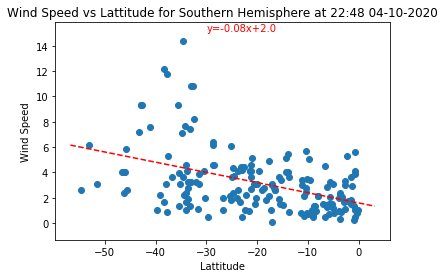

In [19]:
plt.scatter(south['Lattitude'],south['Wind Speed'])
regression(south['Lattitude'],south['Wind Speed'])
plt.show()

In [ ]:
## Again, wind speed shows little dependency on lattitude.  